In [59]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [60]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error
import pandas as pd

In [61]:
df = pd.read_csv('all_props_new.csv')

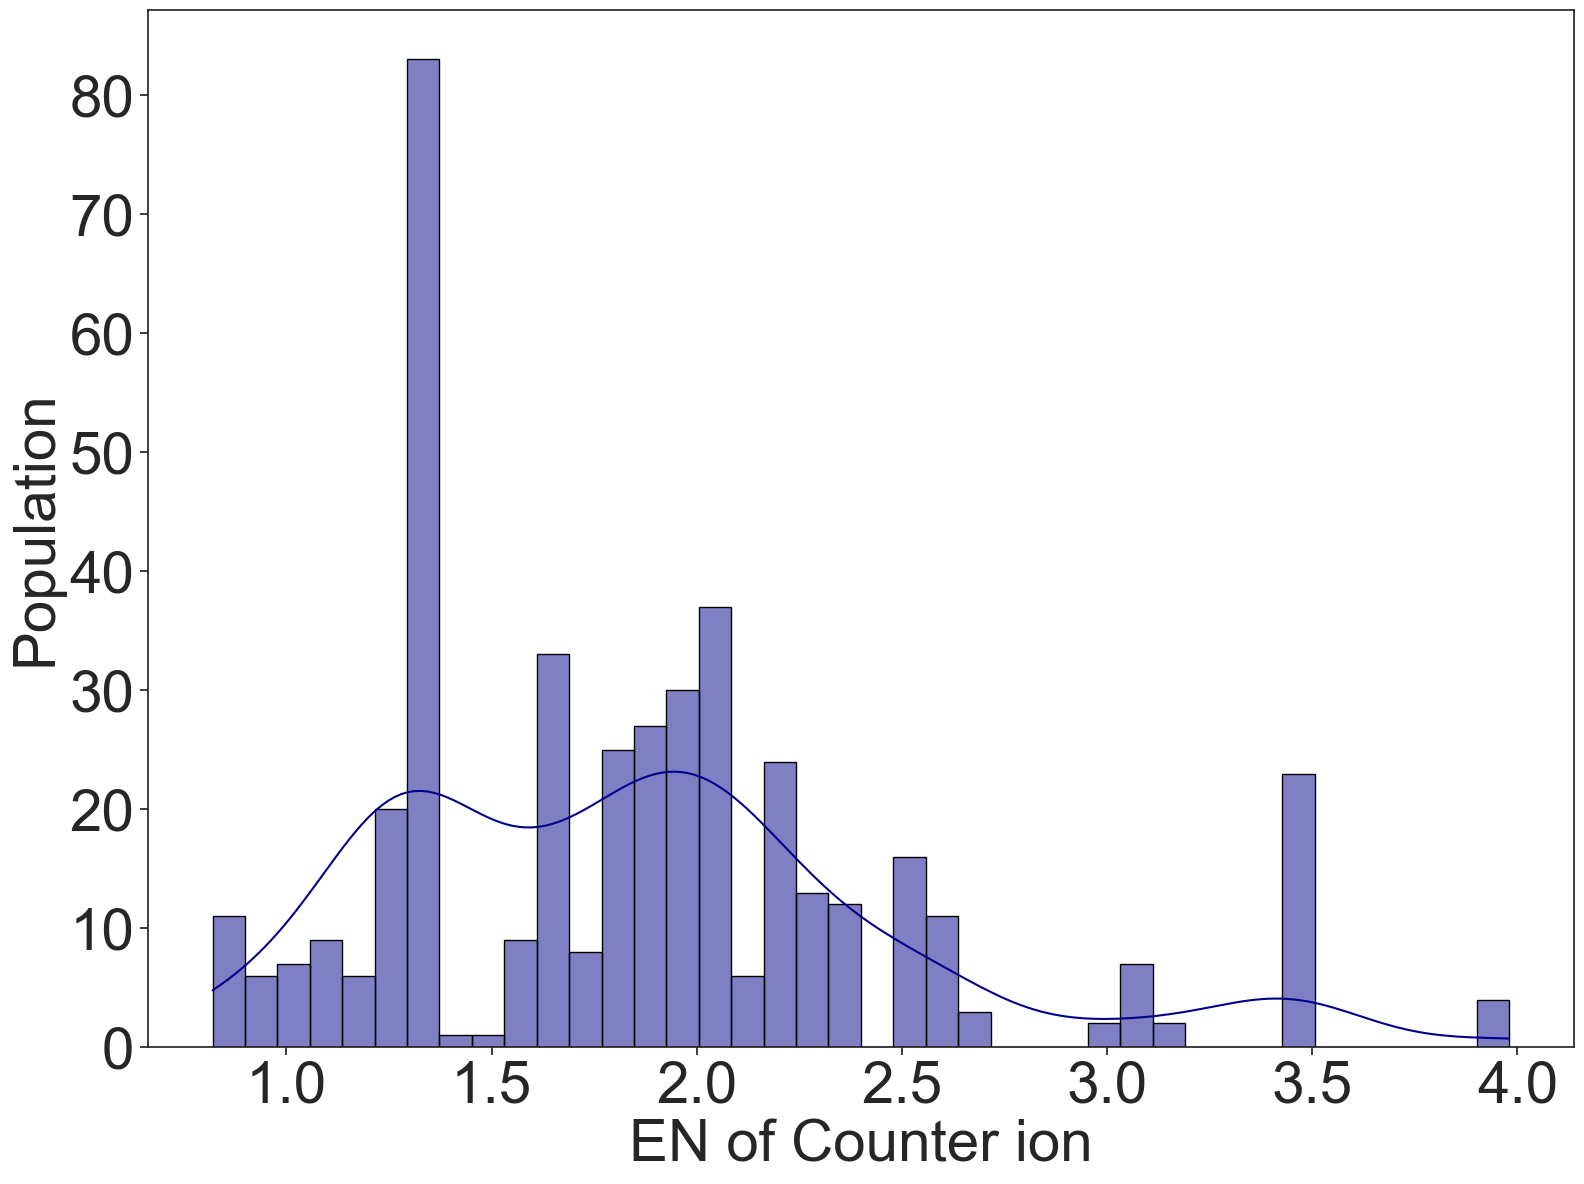

In [62]:
sns.set_theme(style='ticks')
sns.displot(data=df, x='Electronegativity', bins=40, kde=True, height=12, aspect=16/12, 
            color='darkblue', edgecolor='black', linewidth=1)

plt.xlabel('EN of Counter ion', fontsize=42)
plt.ylabel('Population', fontsize=42)
plt.rcParams['font.family'] = 'Arial'
# Customize ticks
plt.xticks(fontsize=42)
plt.yticks(fontsize=42)

# Add border around plot
plt.gca().spines['top'].set_visible(True)
plt.gca().spines['right'].set_visible(True)
plt.gca().spines['bottom'].set_visible(True)
plt.gca().spines['left'].set_visible(True)

plt.tight_layout()
plt.show()


bins -  0- 1
        1- 2
        2- 3
        3- 4

In [63]:
df['Electronegativity'].fillna(0, inplace=True)

/var/folders/zp/h52np6n918qd9v9139ls4z600000gn/T/ipykernel_83884/758592123.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Electronegativity'].fillna(0, inplace=True)


In [64]:
df1 = df[(df['Electronegativity'] > 0) & (df['Electronegativity'] <= 1.5)]
df2 = df[(df['Electronegativity'] > 1.5) & (df['Electronegativity'] <= 2)]
df3 = df[(df['Electronegativity'] > 2) & (df['Electronegativity'] <= 3)]
df4 = df[(df['Electronegativity'] > 3) & (df['Electronegativity'] <= 4)]


In [65]:
a=df1['results_per_total'].mean()
b=df2['results_per_total'].mean()
c=df3['results_per_total'].mean()
d=df4['results_per_total'].mean()

print("Electronegativity Range   Average Result")
print("-----------------------------------------")
print(f"0.0 - 1.5:              {a:.2f}")
print(f"1.5 - 2.0:              {b:.2f}")
print(f"2.0 - 3.0:              {c:.2f}")
print(f"3.0 - 4.0:              {d:.2f}")

Electronegativity Range   Average Result
-----------------------------------------
0.0 - 1.5:              14.12
1.5 - 2.0:              11.76
2.0 - 3.0:              7.91
3.0 - 4.0:              5.42


In [66]:
df['ElectronAffinity'] = df['ElectronAffinity'].fillna(0)

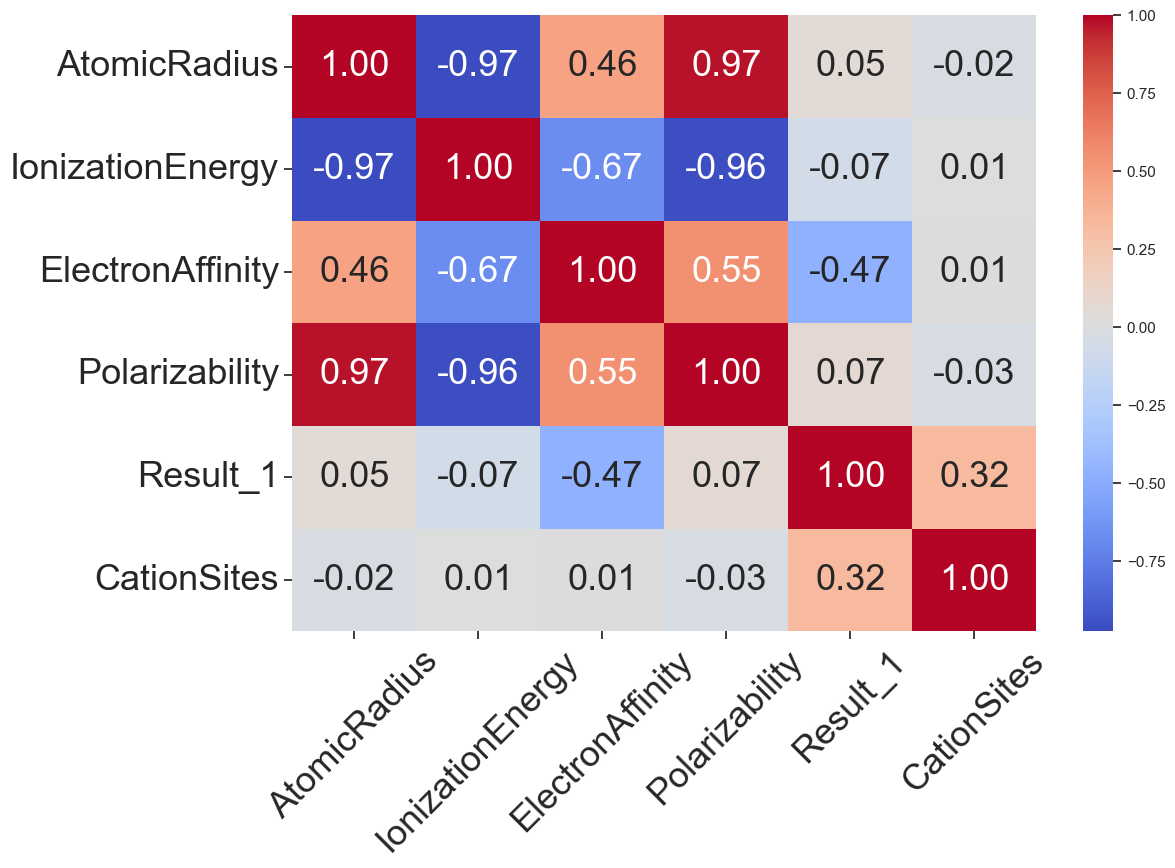

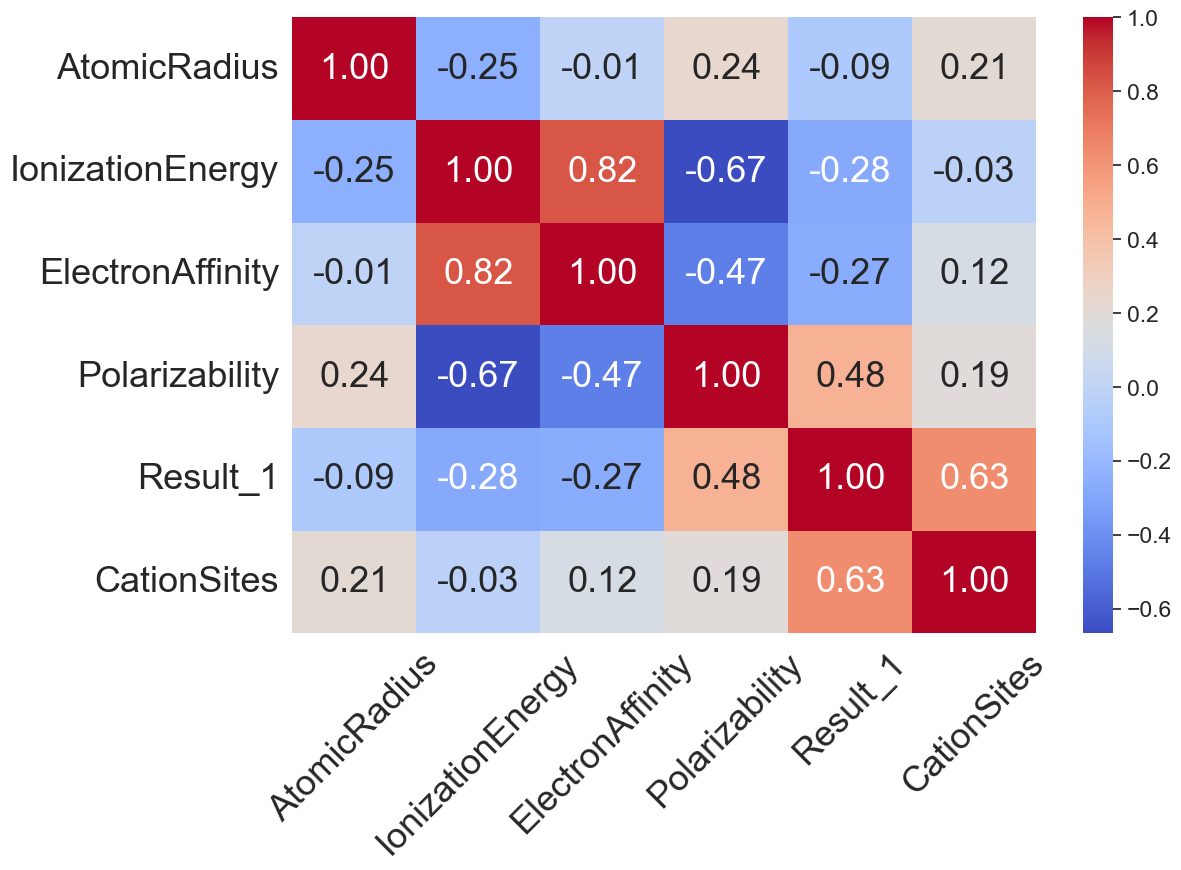

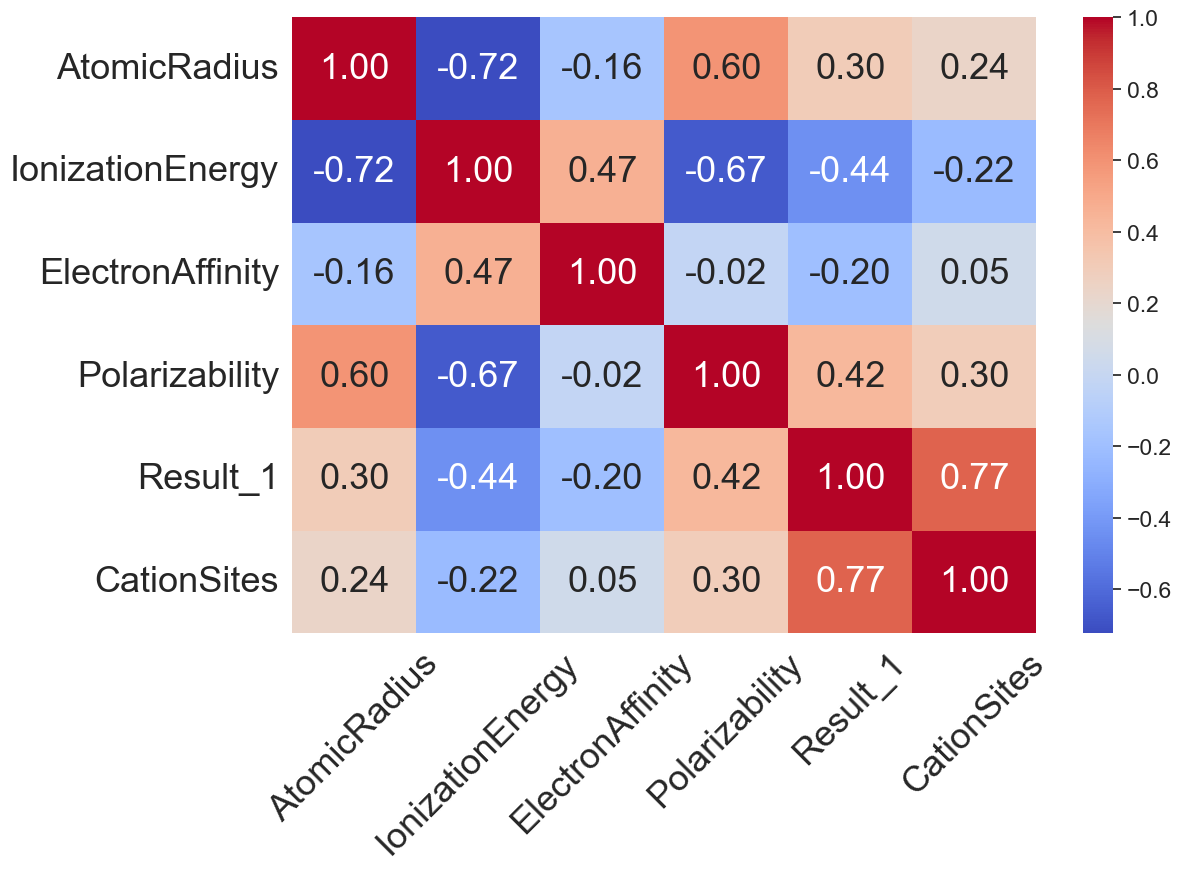

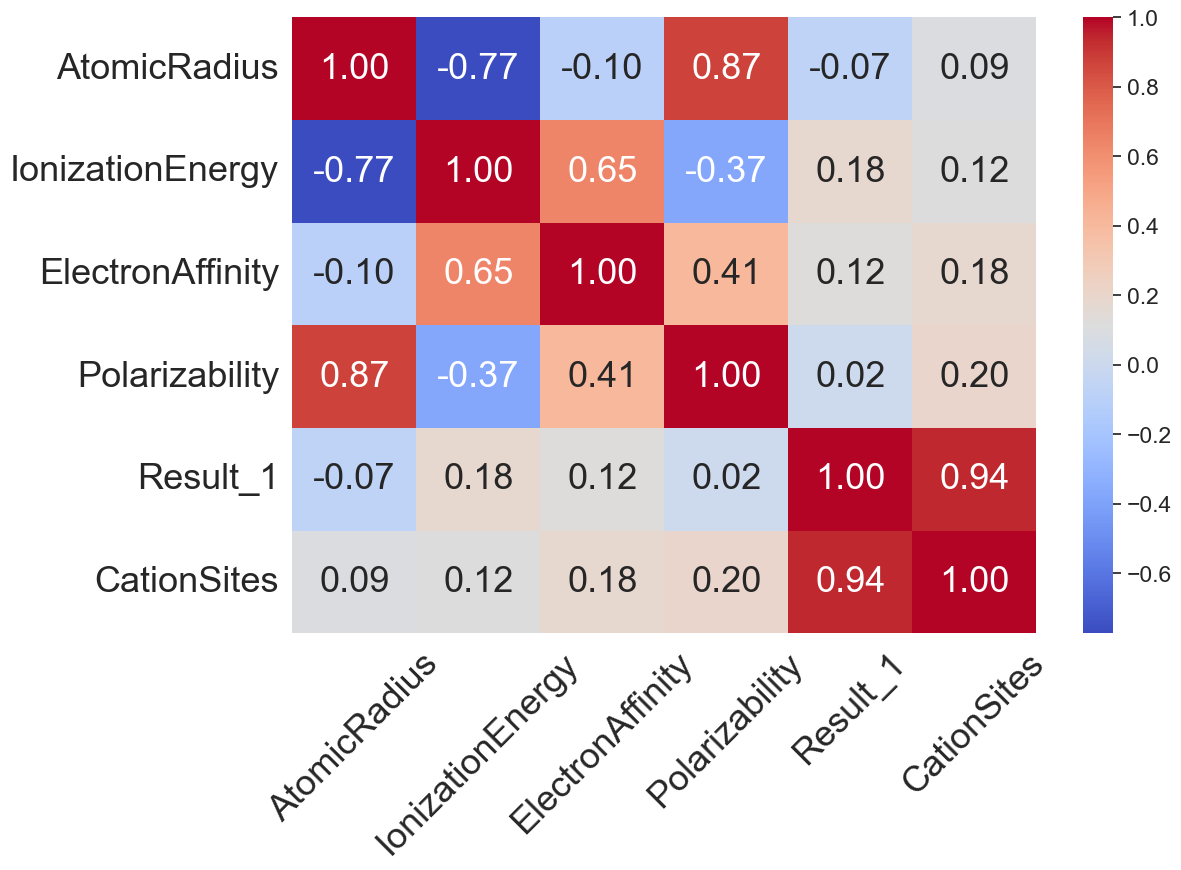

In [67]:
def ploting(df):
    X = df.drop(columns=['Symbol','SpaceGroup','Result', 'Reduced Formula','res_per_volm_per_site'])

    Y_total = df['results_per_total']
    Y_li = df['results_per_cation']


    X.rename(columns={'results_per_total': 'Result_1'}, inplace=True)
    X.rename(columns={'results_per_cation': 'Result_2'}, inplace=True)
    X.rename(columns={'results_per_counter_ion': 'Result_3'}, inplace=True)

    X = X.drop(columns=['SpaceGroupNumber','CounterIonSites','Total Sites','Electronegativity','AtomicMass','Result_2','Result_3','Volume','mid'])

#plot X 


    plt.figure(figsize=(12, 8))
    sns.heatmap(X.corr(method='pearson'), annot=True, fmt=".2f", cmap='coolwarm', annot_kws={"size": 26})
# plt.title('Spearman Correlation Matrix (Li Compounds 400+)')
    plt.xticks(rotation=45, fontsize=26)
    plt.yticks(rotation=0, fontsize=26)
    sns.set(font_scale=1.5 )
    plt.show()

ploting(df1)
ploting(df2)
ploting(df3)
ploting(df4)
